In [ ]:
!pip freeze

absl-py==1.4.0
aiohttp==3.9.5
aiosignal==1.3.1
alabaster==0.7.16
albumentations==1.3.1
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==23.2.0
audioread==3.0.1
autograd==1.6.2
Babel==2.15.0
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.23.1
bigframes==1.8.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.4
bqplot==0.12.43
branca==0.7.2
build==1.2.1
CacheControl==0.14.0
cachetools==5.3.3
catalogue==2.0.10
certifi==2024.6.2
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.86
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpathlib==0.16.0
cloudpickle==2.2.1
cmake==3.27.9
cmdstanpy==1.2.3
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.1
cryptography==42.0.7
cuda-python==12.2.1
cudf-cu12 @ https://pypi.nvidia.c

In [ ]:
#Library Standar untuk menjalankan perintah
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

#Untuk Meencari Standarisasi
from sklearn.preprocessing import StandardScaler

#library untuk memisahkan train set & test set
from sklearn.model_selection import train_test_split

# mencari model dengan  hyperparameter terbaik
from sklearn.model_selection import GridSearchCV

# Mengabaikan Pesan Warning bila ada
import warnings
warnings.filterwarnings("ignore")

#Library Untuk Menyimpan Model
import joblib
import pickle

In [ ]:
#Panggil data yang telah disiapkan pada panel kiri
df=pd.read_csv('/content/air_pollution.csv')
df.head(10)

,Country,City,AQI_Value,AQI_Category,CO_AQI_Value,CO_AQI_Category,Ozone_AQI_Value,Ozone_AQI_Category,NO2_AQI_Value,NO2_AQI_Category,PM25_AQI_Value,PM25_AQI_Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
5,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate
6,Germany,Puttlingen,62,Moderate,1,Good,35,Good,3,Good,62,Moderate
7,Belgium,Puurs,64,Moderate,1,Good,29,Good,7,Good,64,Moderate
8,Russian Federation,Pyatigorsk,54,Moderate,1,Good,41,Good,1,Good,54,Moderate
9,Egypt,Qalyub,142,Unhealthy for Sensitive Groups,3,Good,89,Moderate,9,Good,142,Unhealthy for Sensitive Groups


**PENJELASAN**
1.   **Country** : Nama Negara.
2.   **City** : Nama kota dari negara.
3.   **AQI Value** : Nilai indeks kualitas udara kota secara keseluruhan.
4.   **AQI Category** : Kategori indeks kualitas udara kota secara keseluruhan.
5.   **CO AQI Value** : Nilai indeks kualitas udara Karbon Monoksida pada kota secara keseluruhan.
6.   **CO AQI Category** : Kategori indeks kualitas udara Karbon Monoksida pada kota secara keseluruhan.
7.   **Ozone AQI Value** : Nilai indeks kualitas udara Ozon pada kota secara keseluruhan.
8.   **Ozone AQI Category** : Kategori indeks kualitas udara Ozon kota secara keseluruhan.
9.   **NO2 AQI Value** : Nilai indeks kualitas udara Nitrogen Dioksida kota secara keseluruhan.
10.  **NO2 AQI Category** : Kategori indeks kualitas udara Nitrogen Dioksida kota secara keseluruhan.
11.  **PM2.5 AQI Value** : Nilai indeks kualitas udara Materi Partikulat dengan diameter kota 2,5 mikrometer atau kurang.
12.  **PM2.5 AQI Category** : Kategori indeks kualitas udara Materi Partikulat dengan diameter kota 2,5 mikrometer atau kurang.

In [ ]:
#Kita lihat bahwa dataset memiliki 23.463 baris dan 12 kolom
df.shape

(23463, 12)

In [ ]:
#memngecek apakah terdapat duplicate value
df.duplicated().sum()

0

In [ ]:
#Kita akan melihat keseluruhan dataset yang kita miliki
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI_Value           23463 non-null  int64 
 3   AQI_Category        23463 non-null  object
 4   CO_AQI_Value        23463 non-null  int64 
 5   CO_AQI_Category     23463 non-null  object
 6   Ozone_AQI_Value     23463 non-null  int64 
 7   Ozone_AQI_Category  23463 non-null  object
 8   NO2_AQI_Value       23463 non-null  int64 
 9   NO2_AQI_Category    23463 non-null  object
 10  PM25_AQI_Value      23463 non-null  int64 
 11  PM25_AQI_Category   23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


*Informasi kita dapatkan dari dataset yaitu, 12 label,
7 data yang bertipe object, 5 data data yang bertipe int64.*

In [ ]:
#Selanjutnya kita akan cek nilai null yang ada pada dataset
df.isnull().sum()

Country               427
City                    1
AQI_Value               0
AQI_Category            0
CO_AQI_Value            0
CO_AQI_Category         0
Ozone_AQI_Value         0
Ozone_AQI_Category      0
NO2_AQI_Value           0
NO2_AQI_Category        0
PM25_AQI_Value          0
PM25_AQI_Category       0
dtype: int64

Nilai null yang ada berjumlah 427 pada label Country atau Negara dan 1 pada label city, yang nantinya akan kita kerjakan.

In [ ]:
#Kita akan melihat statistik dari nilai numerik yang terdapat pada dataset
df.describe()

,AQI_Value,CO_AQI_Value,Ozone_AQI_Value,NO2_AQI_Value,PM25_AQI_Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


**VISUALISASI DATA**

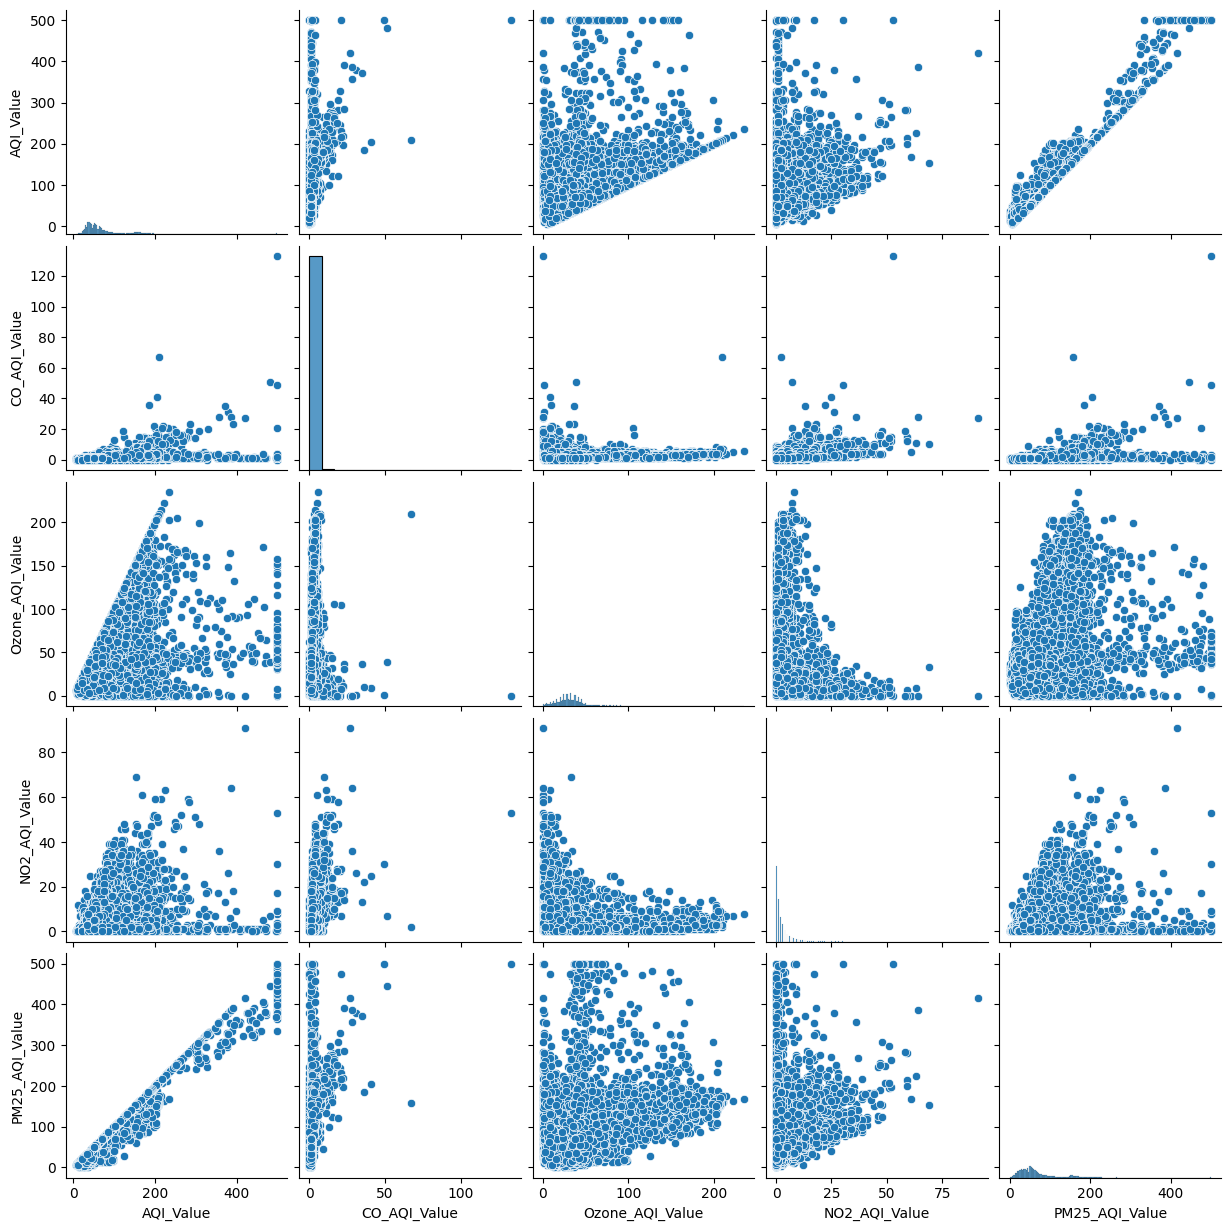

In [ ]:
#Kita akan menggunakan function pairplot untuk menampilkan visualisasi data
sns.pairplot(data=df)

VISUALISASI KATEGORI KUALITAS UDARA BERDASARKAN PARAMETER (AQI_VALUE), KUALITAS KARBONMONOKSIDA BERDASARKAN PARAMETER (CO_AQI_VALUE), KUALITAS MOLEKUL OZON BERDASARKAN PARAMETER (OZONE_AQI_VALUE), KUALITAS NITROGEN DIOKSIDA BERDASARKAN PARAMETER (NO2_AQI_VALUE), DAN KUALITAS PARTICULATE MATTER BERUKURAN 2.5 MIKROMETER BERDASARKAN PARAMETER (PM25_AQI_Value)

<Axes: xlabel='AQI_Category', ylabel='AQI_Value'>

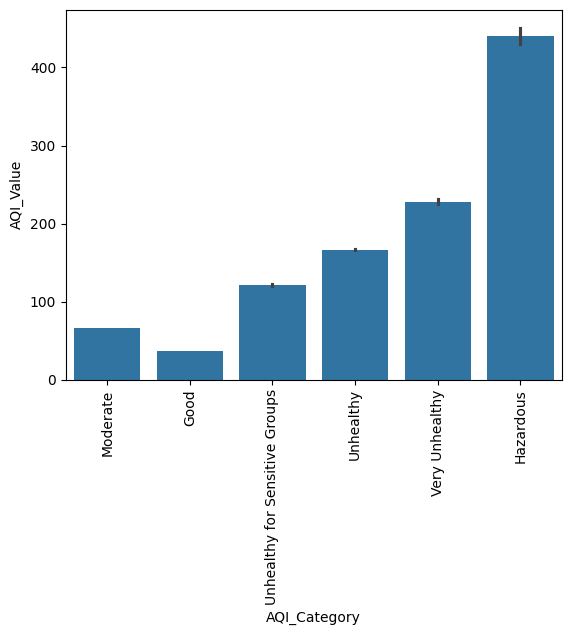

In [ ]:
#visualisasi data dari Air Quality Index
plt.figure()
plt.xticks(rotation=90)
sns.barplot(x='AQI_Category', y='AQI_Value', data=df)

<Axes: xlabel='CO_AQI_Category', ylabel='CO_AQI_Value'>

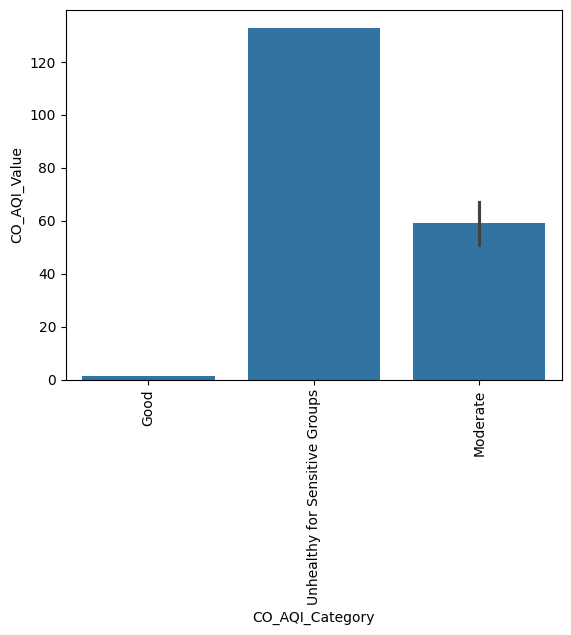

In [ ]:
#viualisasi data CO
plt.figure()
plt.xticks(rotation=90)
sns.barplot(x='CO_AQI_Category', y='CO_AQI_Value', data=df)

<Axes: xlabel='Ozone_AQI_Category', ylabel='Ozone_AQI_Value'>

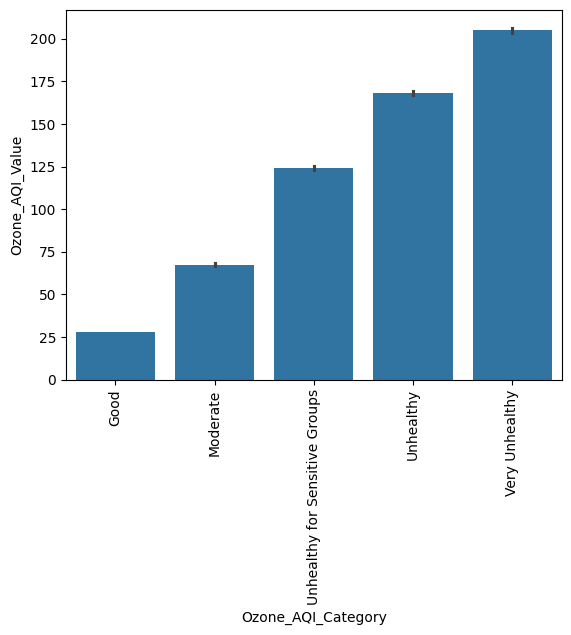

In [ ]:
#viualisasi data molekul ozon
plt.figure()
plt.xticks(rotation=90)
sns.barplot(x='Ozone_AQI_Category', y='Ozone_AQI_Value', data=df)

<Axes: xlabel='NO2_AQI_Category', ylabel='NO2_AQI_Value'>

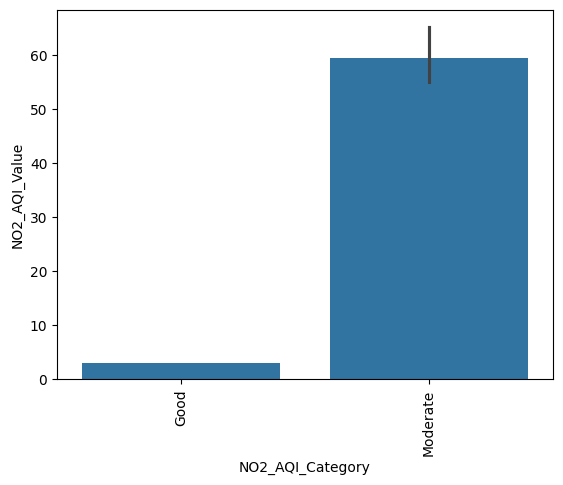

In [ ]:
#viualisasi data nitrogendioksida
plt.figure()
plt.xticks(rotation=90)
sns.barplot(x='NO2_AQI_Category', y='NO2_AQI_Value', data=df)

<Axes: xlabel='PM25_AQI_Category', ylabel='PM25_AQI_Value'>

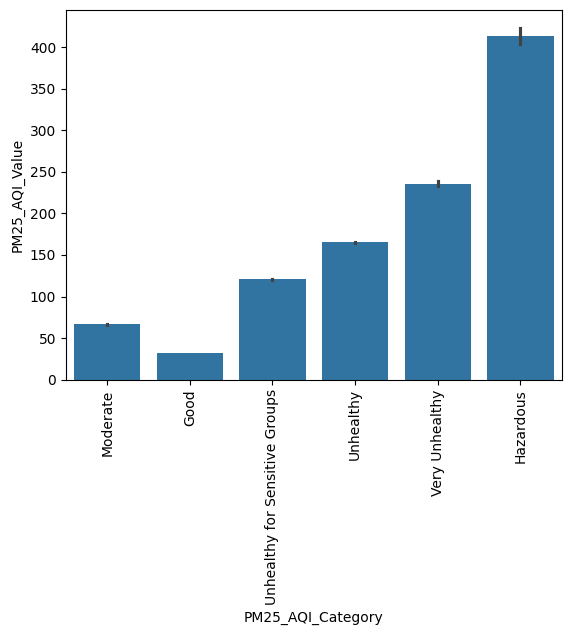

In [ ]:
#viualisasi data partikel udara yang berukuran lebih kecil dari atau sama dengan 2.5 µm (mikrometer)
plt.figure()
plt.xticks(rotation=90)
sns.barplot(x='PM25_AQI_Category', y='PM25_AQI_Value', data=df)

Selanjutnya kita akan merubah nilai null yang ada pada kolom country & city dengan metode `fillna`

`Fillna` = *merubah nilai Null dengan nilai lain yang telah kita analisis analisis*
> source = www.KDnuggets.com




In [ ]:
#merubah nilai null pada kategorical data
df["Country"].fillna(df["Country"].mode()[0], inplace=True)
df["City"].fillna(df["City"].mode()[0], inplace=True)

In [ ]:
#Mengecek Ulang nilai null pada dataset
df.isnull().sum()

Country               0
City                  0
AQI_Value             0
AQI_Category          0
CO_AQI_Value          0
CO_AQI_Category       0
Ozone_AQI_Value       0
Ozone_AQI_Category    0
NO2_AQI_Value         0
NO2_AQI_Category      0
PM25_AQI_Value        0
PM25_AQI_Category     0
dtype: int64

In [ ]:
#Melihat tampilan dataset setelah menghilangkan nilai null pada dataset
df

,Country,City,AQI_Value,AQI_Category,CO_AQI_Value,CO_AQI_Category,Ozone_AQI_Value,Ozone_AQI_Category,NO2_AQI_Value,NO2_AQI_Category,PM25_AQI_Value,PM25_AQI_Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate


Selanjutnya kita akan melihat sedikit korelasi dari label yang akan di gunakan pada pembuatan model nanti

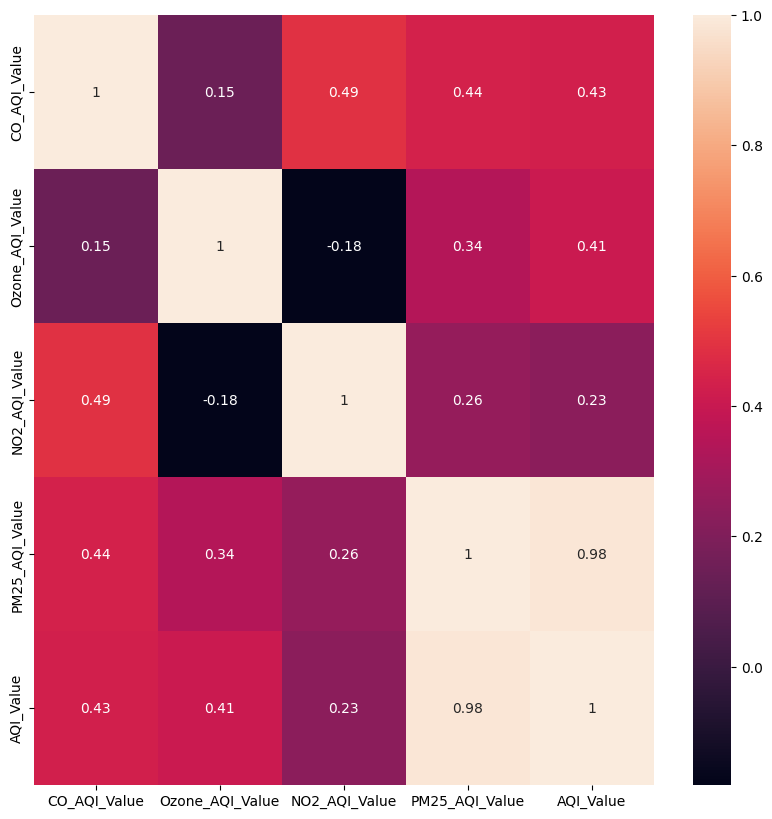

In [ ]:
# Pembuatan heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df[['CO_AQI_Value', 'Ozone_AQI_Value', 'NO2_AQI_Value', 'PM25_AQI_Value', 'AQI_Value']].corr(), annot=True)
plt.show()

# MEMBAGI DATASET UNTUK PEMBUATAN MODEL

Setelah bagian proses dan pemahaman dataset kita akan membagi dataset menjadi 2 yaitu untuk `train` dan `test` untuk pembuatan model, kita menentukan parameter `AQI_Value` & `AQI_Category` sebagai tujuan dari model.

In [ ]:
#Membagi menjadi 2 label yaitu `X` dan `Y`
X=df[['CO_AQI_Value', 'Ozone_AQI_Value', 'NO2_AQI_Value', 'PM25_AQI_Value']]
Y=df['AQI_Value']

In [ ]:
#tampilan X setelah dipisahkan dari dataset
X.head()

,CO_AQI_Value,Ozone_AQI_Value,NO2_AQI_Value,PM25_AQI_Value
0,1,36,0,51
1,1,5,1,41
2,1,39,2,66
3,1,34,0,20
4,0,22,0,6


In [ ]:
#tampilan Y setelah dipisahkan dari dataset
Y.head()

0    51
1    41
2    66
3    34
4    22
Name: AQI_Value, dtype: int64

In [ ]:
#membagi training data & testing data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(21116, 4) (2347, 4) (21116,) (2347,)


Setelah membagi data testing dan data training kita perlu melakukan standarisasi pada data training dan juga testing

In [ ]:
# Standarisasi
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Kita akan mencoba beberapa algoritma untuk mencari nilai kualitas udara (AQI_VALUE) dari nilai CO, Ozon, NO2, Serta PM2.5

# LINEAR REGRESSION

---

In [ ]:
#pertama kita siapkan library untuk algoritma linear Regression
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg_model=LinearRegression()
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
lin_reg_model.score(X_test, Y_test)

0.97091471554107

# DECISION TREE REGRESSOR
---



In [ ]:
#pertama kita siapkan library untuk algoritma Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt_model=DecisionTreeRegressor()
dt_model.fit(X_train,Y_train)

DecisionTreeRegressor()

In [ ]:
dt_model.score(X_test, Y_test)

0.996260253959986

# RANDOM FOREST REGRESSOR
---

In [ ]:
#MEMANGGIL LIBRARY RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model=RandomForestRegressor()
rf_model.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
rf_model.score(X_test,Y_test)

0.9975119669805697

# XGB REGRESSOR
---

In [ ]:
# MEMANGGIL XGB REGRESSOR LIBRARY
from xgboost import XGBRegressor

In [ ]:
# MENJALANKAN ALGORITMA XGB REGRESSOR
xgb_model = XGBRegressor()
xgb_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb_model.score(X_test, Y_test)

0.9923260571110498

# SUPPORT VECTOR MACHINE



---

In [ ]:
#MEMANGGIL SVM LIBRARY
from sklearn import svm

In [ ]:
svm_model = svm.SVR()
svm_model.fit(X_train, Y_train)

SVR()

In [ ]:
svm_model.score(X_test, Y_test)

0.864580919643769

# CLASSIFICATION ALGORITHM

---
PERGANTIAN PARAMETER UTAMA DIKARENAKAN AKAN MENGGUNAKAN KLASIFIKASI

KITA AKAN MENGUBAH TUJUAN DARI AQI_VALUE KE AQI_CATEGORY

In [ ]:
# membuat split dataset baru dengan AQI Category sebagai acuan
X2=df[['CO_AQI_Value', 'Ozone_AQI_Value', 'NO2_AQI_Value', 'PM25_AQI_Value']]
Y2=df['AQI_Category']

In [ ]:
# pembagian train dan test data baru
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2,Y2,test_size=0.33,random_state=70)
print(X_train2.shape,X_test2.shape,Y_train2.shape,Y_test2.shape)

(15720, 4) (7743, 4) (15720,) (7743,)


In [ ]:
#Standarisasi Ulang pada data train dan testing baru
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

# LOGISTIC REGRESSION
---

In [ ]:
#Memanggil library Logistic Regression
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model=LogisticRegression()
lr_model.fit(X_train2,Y_train2)

LogisticRegression()

In [ ]:
lr_model.score(X_test2,Y_test2)

0.9354255456541393

# K - NEAREST NEIGHBOUR
---

In [ ]:
# LIBRARY KNN CLASSIFIER
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train2, Y_train2)

KNeighborsClassifier()

In [ ]:
knn_model.score(X_test2, Y_test2)

0.9660338370140772

# NAIVE BAYES
---

In [ ]:
# NAIVE BAYES LIBRARY
from sklearn.naive_bayes import GaussianNB

In [ ]:
# MENJALANKAN ALGORITMA
nvbayes_model = GaussianNB()
nvbayes_model.fit(X_train2, Y_train2)

GaussianNB()

In [ ]:
nvbayes_model.score(X_test2, Y_test2)

0.8904817254294202

# ADABOOST CLASSIFIER
---

In [ ]:
# ADABOOST CLASSIFIER LIBRARY
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# MEMASUKKAN DATA TRAIN DAN TEST KE ALGORITMA
abc_model = AdaBoostClassifier()
abc_model.fit(X_train2, Y_train2)

AdaBoostClassifier()

In [ ]:
abc_model.score(X_test2, Y_test2)

0.4936071290197598

# EVALUASI

---

pada evaluasi ini kita mengutamakan evaluasi dari algoritma `Linear Regression`, mengapa `Linear Regression`?, Karena hasil skor dari algoritma regresi lainnya sedikit menunjukkan indikasi **Overfitting** yang tidak baik pada model. Evaluasi akan menggunakan metode `RootMeanSquare (RMSE)` dan `RSquared`. Kita juga akan sedikit melihat evaluasi dari salah satu algoritma klasifikasi yang memiliki skor tinggi. Mengapa Tidak Menggunakan Algoritma Klasifikasi ? Karena referensi untuk pembuatan model lebih merujuk ke algoritma regresi.


In [ ]:
# Library yang dibutuhkan untuk evaluasi
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
# prediksi data training
train_pred=lin_reg_model.predict(X_train)
# prediksi data testing
test_pred=lin_reg_model.predict(X_test)

In [ ]:
# Pengecekan Hasil Root Mean Square Error
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("SKOR RMSE DATA TRAINING =",str(RMSE_train))
print("SKOR RMSE DATA TESTING =",str(RMSE_test))

SKOR RMSE DATA TRAINING = 8.89051066502447
SKOR RMSE DATA TESTING = 9.368616103611156


In [ ]:
# Pengecekan Nilai RSquared
print("Nilai RSquared Pada Data Training = ",lin_reg_model.score(X_train, Y_train)*100, "%")
print("Nilai RSquared Pada Data Testing = ",lin_reg_model.score(X_test, Y_test)*100, "%")

Nilai RSquared Pada Data Training =  97.4954023200207 %
Nilai RSquared Pada Data Testing =  97.091471554107 %


In [ ]:
# Prediksi Menggunakan Linear Regression
lin_reg_pred = lin_reg_model.predict(X_test)

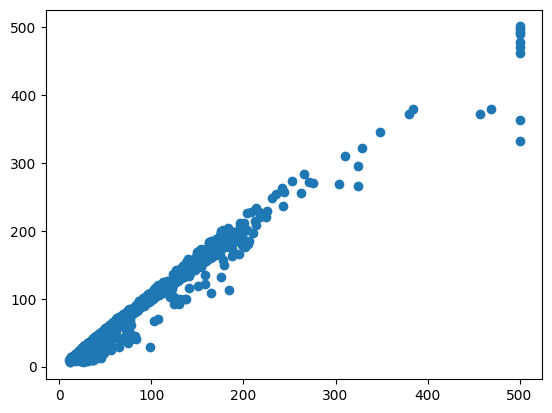

In [ ]:
plt.scatter(Y_test, lin_reg_pred)

Algoritma `Linear Regression` Berjalan Cukup Baik dengan model ini dengan menunjukkan skor `RMSE` yang cukup rendah yang baik.

Kita akan mencoba melihat hasil dari algoritma regresi lainnya yaitu `DecisionTreeRegressor`

In [ ]:
#Evaluasi DecisionTreeRegressor

# prediksi data training
dt_train_pred=dt_model.predict(X_train)
# prediksi data testing
dt_test_pred=dt_model.predict(X_test)

# Pengecekan Hasil Root Mean Square Error
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,dt_train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,dt_test_pred)))
print("SKOR RMSE DATA TRAINING =",str(RMSE_train))
print("SKOR RMSE DATA TESTING =",str(RMSE_test))

# Pengecekan Nilai RSquared
print("Nilai RSquared Pada Data Training = ",dt_model.score(X_train, Y_train)*100, "%")
print("Nilai RSquared Pada Data Testing = ",dt_model.score(X_test, Y_test)*100, "%")

SKOR RMSE DATA TRAINING = 0.0
SKOR RMSE DATA TESTING = 3.3593854815732085
Nilai RSquared Pada Data Training =  100.0 %
Nilai RSquared Pada Data Testing =  99.6260253959986 %


Dari hasil skor untuk `DecisionTreeRegressor` Menunjukkan Overfitting yang tidak baik untuk model.

Selanjutnya kita akan mencoba evaluasi **Algoritma Klasifikasi** yang telah diuji pada data training dan data testing. Kita akan mencoba evaluasi dengan mencari Nilai `Akurasi(accuracy)` pada data training serta data testing, lalu kita akan mencari `KappaScore`, dan melakukan Prediksi secara manual untuk mencoba.

In [ ]:
# Logistic Regression

#Prediksi Data Training dan testing
lr_train_pred = lr_model.predict(X_train2)
lr_test_pred = lr_model.predict(X_test2)
# akurasi pada data training dan testing
print("Akurasi Training =", accuracy_score(Y_train2, lr_train_pred))
print("Akurasi Testin =", accuracy_score(Y_test2, lr_test_pred))

#hasil KappaScore
print("KappaScore = ", metrics.cohen_kappa_score(Y_test2, lr_test_pred))

Akurasi Training = 0.941030534351145
Akurasi Testin = 0.9354255456541393
KappaScore =  0.9005089168706578


In [ ]:
# Prediksi Manual
manual_1 = lr_model.predict([[727,327,78,100]])
print("Hasil Manual Pertama =", manual_1)

manual_2 = lr_model.predict([[25,3,41,24]])
print("Hasil Manual Kedua =", manual_2)

Hasil Manual Pertama = ['Hazardous']
Hasil Manual Kedua = ['Hazardous']


Hasil Menunjukkan bahwa `LogisticRegression` menunjukkan berforma yang tidak buruk pada model dengan mengklasifikasikan nilai - nilai tersebut ke kategori yang dibutuhkan, sehingga dapat menjadi opsi untuk membuat model dengan algoritma klasifikasi

Tahap Terakhir Evaluasi, kita akan mencoba membuat data baru untuk mencari Air Quality Index, kita akan mencari `nilai(Value)` AQI dari data baru yaitu nilai dari Karbon Monoksida, nilai kualitas Ozon, nilai Nitrogen Dioksida, dan nilai Partikulat dengan diameter kota 2,5 mikrometer.

In [ ]:
# FINAL EVALUATION

#data input
nilai_karbonmonoksida = 30 # @param {type:"slider", min:1, max:500, step:1}
nilai_ozon = 56 # @param {type:"slider", min:1, max:500, step:1}
nilai_nitrogendioksida = 38 # @param {type:"slider", min:1, max:500, step:1}
nilai_pm25 = 63 # @param {type:"slider", min:1, max:500, step:1}
#standarisasi data input
data_input = [[nilai_karbonmonoksida, nilai_ozon, nilai_nitrogendioksida, nilai_pm25]]
#nilai kualitas udara dari data yang telah diinput
kualitas_udara = lin_reg_model.predict(data_input)
#hasil nya
print(f'Kualitas udara secara keseluruhan adalah = ', end='')
if kualitas_udara < 50:
  print("Memiliki Udara Yang Baik.")
elif kualitas_udara < 100:
  print("Memiliki Udara Yang Wajar.")
elif kualitas_udara < 150:
  print("Memiliki Udara Yang Sensitif Terhadap Orang Tertentu.")
elif kualitas_udara < 200:
  print("Memiliki Udara Yang Kurang Baik.")
elif kualitas_udara < 250:
  print("Memiliki Udara Yang Tidak Baik Untuk Kesehatan.")
else:
  print("Memiliki Udara Yang Sangat Berbahaya.")

Kualitas udara secara keseluruhan adalah = Memiliki Udara Yang Sangat Berbahaya.


# SAVE THE MODEL
---

Setelah Selesai Semua Model Akan Di simpan menggunakan pickle

In [ ]:
#menyimpan model
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(scaler, open('scaler.sav', 'wb'))
pickle.dump(lin_reg_model, open('lin_reg_model.pkl', 'wb'))
pickle.dump(lin_reg_model, open('lin_reg_model.sav', 'wb'))